# Assignment 6.1

Name:  
Date:

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


`Calculating the prediction equation, we can see that the intercept point is -2.83 and the slope is 0.87. This gives us the equation 0.87x - 2.83 for a given women's record time (x). The predicted men's record time when timeW is 490.05, would be calculated by plugging in 490.05 into the equation to get 423.94 minutes. `

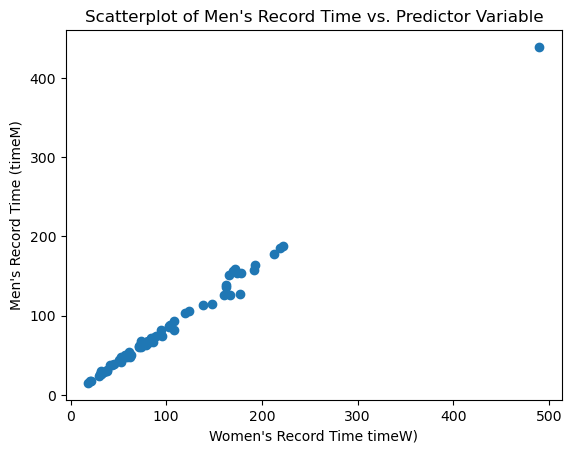

Prediction Equation: timeM = 0.87 * timeW + -2.83
Predicted Men's Record Time for timeW = 490.05 minutes: 423.94 minutes
Correlation Coefficient is: 1.0
0      89.72
1     222.03
2     102.48
3      52.52
4      58.78
       ...  
64    191.35
65    173.93
66    169.47
67     71.55
0       0.00
Length: 69, dtype: float64
The slope is:  0.8701138977245547
The intercept is:  -2.7163159136844404


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np


url_to_data = 'http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat'
data = pd.read_csv(url_to_data, sep='\s+')

# Create a scatterplot
plt.scatter(data['timeW'], data['timeM'])
plt.xlabel("Women's Record Time timeW)")
plt.ylabel("Men's Record Time (timeM)")
plt.title("Scatterplot of Men's Record Time vs. Women's Record Time")
plt.show()

# Independent variable (Women's Record time)
x = data['timeW']  
# Dependent variable (Men's record time)
y = data['timeM']

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Predict men's time using mx + b equation 
x1 = 490.05
predicted_timeM = m * x1 + b

# Output results
print(f'Prediction Equation: timeM = {m:.2f} * timeW + {b:.2f}')
print(f"Predicted Men's Record Time for timeW = 490.05 minutes: {predicted_timeM:.2f} minutes")

# part b
correlation(x, y)

# part c
zero_intercept(x, y)

(b) Find and interpret the correlation.

`From looking at the scatter plot, we can see the correlation is positive and also there is a strong correlation. Using numpy corrcoef function, we calculate the correlation as 1, however from visualizing the data, we can see there are some values that might skew this slightly.`

In [13]:
def correlation(x, y):
    corr = round(np.corrcoef(x, y)[0,1],2)
    print(f"Correlation Coefficient is: {corr}")

(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

`This natural constraint would shift the line of fit to go through the origin (0, 0). We'd expect the linear regression model forumla to be mx since b is 0 in this case. `

In [27]:
def zero_intercept(x, y):
    x = x.append(pd.Series([0][0]))
    y = y._append(pd.Series([0]))
    print(x)
    
    
    # Calculate slope (m) and intercept (b)
    m, b = np.polyfit(x, y, 1)
    print("The slope is: ", m)
    print("The intercept is: ", b)

## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

`There is one point that lies well above the trend for both number of firearms and number of deaths. We can look at the actual data and see this is the US with many more deaths as well as many more firearms.`

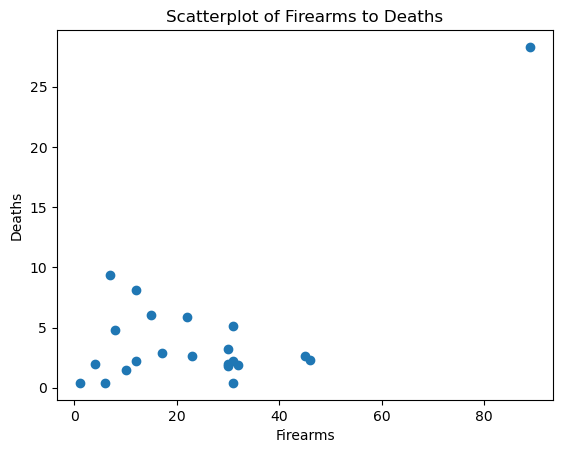

Coefficient With Outlier: 0.6344
Coefficient Without Outlier: -0.1751


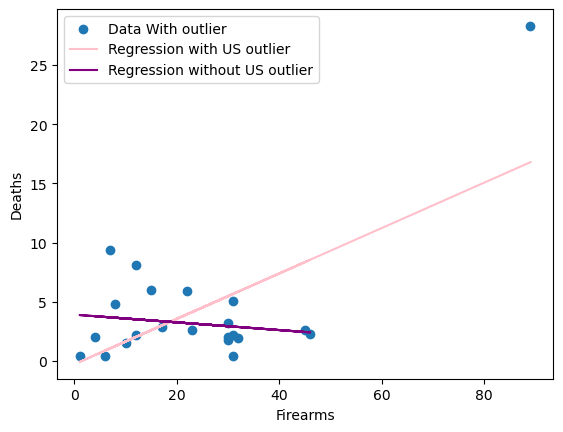

In [53]:
import pandas as pd

url_to_data = 'https://stat4ds.rwth-aachen.de/data/Firearms.dat'
data = pd.read_csv(url_to_data, sep='\s+')

x = data['firearms']
y = data['deaths']
# Create a scatterplot
plt.scatter(x, y)
plt.xlabel("Firearms")
plt.ylabel("Deaths")
plt.title("Scatterplot of Firearms to Deaths")
plt.show()


# part b
before_removal = correlation(data)
# remove outlier
data_without = data[data['Nation'] != 'US']
x_without = data['firearms']
y_without = data['deaths']
after_removal = correlation(data_without)

print(f"Coefficient With Outlier: {before_removal:.4f}")
print(f"Coefficient Without Outlier: {after_removal:.4f}")

# part c
model_with = linear_regression(data)
model_without = linear_regression(data_without)

plt.scatter(data['firearms'], data['deaths'], label="Data With outlier")
plt.plot(data['firearms'], model_with.predict(data[['firearms']]), color='pink', label="Regression with US outlier")
plt.plot(data_without['firearms'], model_without.predict(data_without[['firearms']]), color='purple', label="Regression without US outlier")

plt.xlabel("Firearms")
plt.ylabel("Deaths")
plt.legend()
plt.show()


(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

`The correlation with the outlying observation is 0.6334 where the correlation without the outlying observation is -0.1751. This data set is small, so a single value has a bigger influence over the correlation than if there was a large dataset. The single outlier in this case is a large positive value for both x and y, so the correlation will be skewed in that direction. When we remove it, we see that there is a pretty weak association.`

In [51]:
def correlation(df):
    corr = df['deaths'].corr(df['firearms'])
    return corr

(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

`When plotting the linear regression models with and without the outlier, we can see the two lines of fit. With the outlier, pink line, it is a steep positive line, which makes sense since it is skewed by the far upper point. In contrast we have a much less sloping line, purple, that shows the model without the outlier. When working with small datasets, the impact a single point can have on the models is much more significant than when we work with larger datasets. Each point has a stronger weight to it.`

In [46]:
def linear_regression(df):
    model = LinearRegression()
    model.fit(df[['firearms']], df[['deaths']])
    
    return model

## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

(a) Construct the two scatterplots shown in Figure 6.3.

`Scatter plots below`

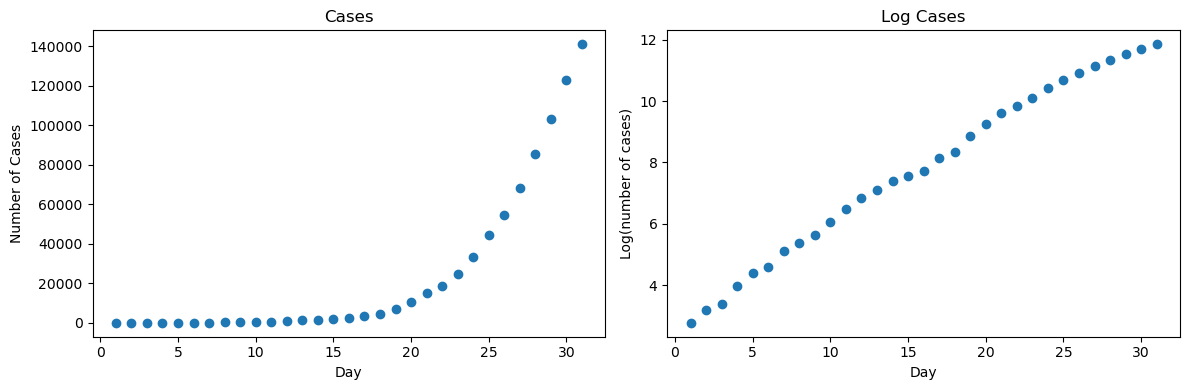

Correlation between time and cases: 0.7937
Correlation between time and log(cases): 0.9968
Prediction Equation: log(y) = 2.8439 + 0.3088 * x
exp(beta1) = 1.36


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url_to_data = 'http://stat4ds.rwth-aachen.de/data/Covid19.dat'
data = pd.read_csv(url_to_data, sep='\s+')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(data['day'], data['cases'], marker='o', label='Cases')
plt.title('Cases')
plt.xlabel('Day')
plt.ylabel('Number of Cases')


plt.subplot(1, 2, 2)
plt.scatter(data['day'], np.log(data['cases']), marker='o', label='Log Cases')
plt.title('Log Cases')
plt.xlabel('Day')
plt.ylabel('Log(number of cases)')
plt.tight_layout()
plt.show()

# part b
corr, log_corr = covid_correlation(data)
print(f"Correlation between time and cases: {corr:.4f}")
print(f"Correlation between time and log(cases): {log_corr:.4f}")

# part c
linear_model_fit(data)

(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

`Both the correlation between time and cases and time and log(cases) are positive correlations close to 1. We can see that the correlation between time and cases is roughly 0.79, which tells us there is some correlation that as time goes on, the number of cases increases. We can see that the correlation is stronger between time and log(cases) which tells us there is a stronger correlation between time and log(cases). The text mentions that linear models fit better when applied to exponential functions, which we can see is the case here. The correlation is much stronger for the exponential function.`

In [70]:
def covid_correlation(data):
    corr = np.corrcoef(data['cases'], data['day'])[0, 1]
    log_corr = np.corrcoef(np.log(data['cases']), data['day'])[0, 1]
    return corr, log_corr

(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

`Using our forumla, we need to calculate Beta0 and Beta1 to get the intercept and slope for our equation. We see that Beta0 is 2.8439, which tells us the intercept is at 2.8439 and Beta1 is 0.3088 which gives us the slope. The Prediction equation is therefore, log(y) = 2.8439 + 0.3088 * x. The predicted count at day x + 1 is the predicted count at day x, multiplied by exp(Beta1). This can be interpreted as the exponential growth factor and in this data set, we would calculate this as exp(2.8439 + 0.3088x) = 17.18(1.362)^x.`

In [74]:
def linear_model_fit(data):
    
    # Create log_cases variable
    data['log_cases'] = np.log(data['cases'])
    
    # Independent variable x (days)
    x = data['day']

    # Constant for intercept
    x = sm.add_constant(x)
    
    # Fit the linear regression model
    model = sm.OLS(data['log_cases'], x).fit()

    # Calculate beta0 and beta1
    beta0 = model.params['const']
    beta1 = model.params['day'] 

    # Report the prediction equation
    print(f"Prediction Equation: log(y) = {beta0:.4f} + {beta1:.4f} * x")
    
    # calculate exp(b1)
    exp_beta1 = np.exp(beta1)
    print(f"exp(beta1) = {exp_beta1:.2f}")

## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

`Simpson's Paradox occurs when the direction of association between two variables changes when an additional variable is taken into account. When looking at the crime rate in Florida counties, we can see Simpson's paradox. When initially looking at crime rate and education, there is a positive correlation. It is not very strong, but still a relevant correlation. Areas with higher education levels tend to also have higher crime rates. However, when adding in urbanization, we see a reversal in correlation. As education increases, crime rates tend to decrease. More urbanized areas have higher crime rates and also might have higher crime levels. In this example the third variable, confounding variable, urbanization may more greatly impact crime rates than our initial variable, education. Since urbanization has a stronger positive correlation with both education and crime rates, that might explain the cause for the change in direction.`

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

`Creating a sample set of possible values for individuals we can see a much less obvious correlation between education and income. Ecological fallacy is when inferences about an invidual are drawn from the characteristics of a group. This can be misleading because correlations based on a group may not reflect the findings of the individual. In this example, we might generalize that higher education correlates with higher income, but when looking at individuals we do not have this concrete of a finding. It is important to not generalize too much about individuals based on correlations within a group.`

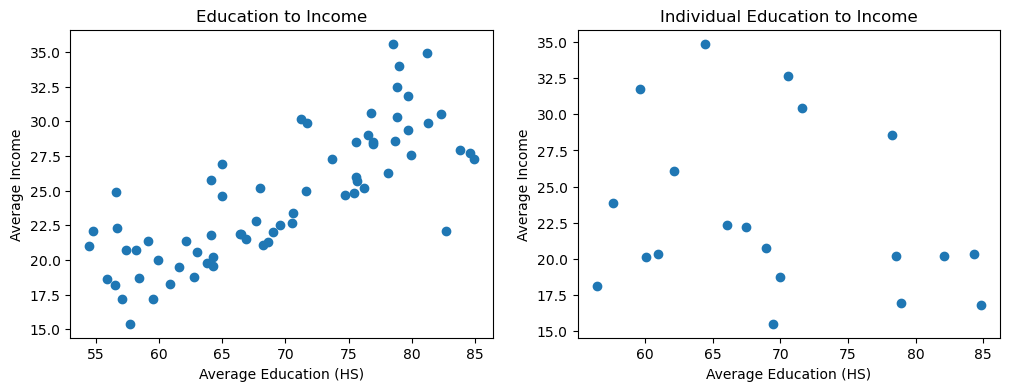

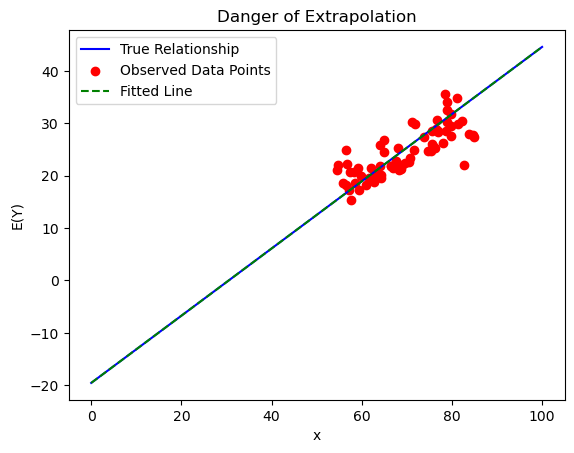

In [85]:
import pandas as pd
from decimal import Decimal
import random

url_to_data = 'https://stat4ds.rwth-aachen.de/data/Florida.dat'
data = pd.read_csv(url_to_data, sep='\s+')

education = data['HS']
income = data['Income']

# County level 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(education, income, label='Counties')
plt.xlabel("Average Education (HS)")
plt.ylabel("Average Income")
plt.title("Education to Income")

# Individual level
start_range = Decimal('54.0')
end_range = Decimal('85.0')
precision = Decimal('0.1')
num_elements = 20
ind_education = [start_range + Decimal(random.random()) * (end_range - start_range) for _ in range(num_elements)]
start_range = Decimal('15.4')
end_range = Decimal('35.0')
precision = Decimal('0.1')
ind_income = [start_range + Decimal(random.random()) * (end_range - start_range) for _ in range(num_elements)]

plt.subplot(1, 2, 2)
plt.scatter(ind_education, ind_income, label='Individual')
plt.xlabel("Average Education (HS)")
plt.ylabel("Average Income")
plt.title("Individual Education to Income")
plt.show()

# part C
extrapolation()

(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

`The range of observed values for x withint our data is between 54.5 and 84.9. If evaluating x=0, we are making an assumption that the trend continues outside of the observed data. This is extrapolation and can produce inaccurate results that do not reflect reality. In this case, it would not be sensible to use the lease squares line to predict the county's median income if x=0 since that value is outside our range. We can see that extending the fit line beyond the data does not accurately capture the observed data and could lead to drawing false conclusions.`

In [84]:
def extrapolation():
    x_observed = np.array([54.5, 63.4, 72.5, 84.9])
    y_observed = np.array([15.4, 22.3, 31.2, 34.9])
    
    slope = (y_observed[-1] - y_observed[0]) / (x_observed[-1] - x_observed[0])
    intercept = y_observed[0] - slope * x_observed[0]
    
    # Create a hypothetical true relationship
    x_true = np.linspace(0, 100, 100)
    
    linear_equation = slope * x_true + intercept
    
    # Hypothetical true linear relationship
    y_true = linear_equation

    # Plot hypothetical relationship
    plt.plot(x_true, y_true, label="True Relationship", color='blue')
    plt.scatter(data['HS'], data['Income'], label="Observed Data Points", color='red')
    plt.plot(x_true, linear_equation, linestyle='-*-', label="Fitted Line", color='green')

    # Add labels and legend
    plt.xlabel("x")
    plt.ylabel("E(Y)")
    plt.title("Extrapolation")
    plt.legend()

    # Show the plot
    plt.show()


## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

`If we use alpha=0.05, we can see that our p-values are very small. They are all less then the given alpha. This tells us that there is strong evidence to reject the null hypothesis. Rejecting the null hypothesis tells us that high school GPA, weekly hours watching TV and weekly hours participating in sports each have statistically significan impact on our response variable of college GPA.`

In [100]:
import pandas as pd 
import statsmodels.api as sm

url_to_data = 'https://stat4ds.rwth-aachen.de/data/Students.dat'
data = pd.read_csv(url_to_data, sep='\s+')

# Add constant for our prediction model
data = sm.add_constant(data)

# Define variables
predictor_var = ['const', 'hsgpa', 'tv', 'sport']
response_var = ['cogpa']

# Multiple regression model
model = sm.OLS(data[response_var], data[predictor_var]).fit()

coefficients = model.params

# Build prediction equation in relation to each predictor var
prediction_equation = f"{response_var} = {coefficients['const']:.4f} + " + " + ".join([f"{coefficient:.4f}\
    * {predictor}" for predictor, coefficient in zip(predictor_var[1:], coefficients[1:])])

print("\nPrediction Equation:")
print(prediction_equation)

# Calculate p-values from the model
p_values = model.pvalues
print("\nP-values:")
print(p_values)

# part c
r_squared(data, model)


Prediction Equation:
['cogpa'] = 2.8154 + 0.2088    * hsgpa + 0.0033    * tv + -0.0141    * sport

P-values:
const    2.862880e-10
hsgpa    4.391478e-02
tv       6.290793e-01
sport    2.303431e-01
dtype: float64

R-Squared Stuff:
R-squared: 0.1045
Adjusted R-squared: 0.0565
Multiple Correlation (Multiple R): 0.3233


(b)  Summarize the estimated effect of *hsgpa.*

`In part A, we calculated the coefficent for hsgpa to be 0.0033. We know that the effect this has on predicting the college gpa for an individual would be for each one point increase in GPA, we would see a 0.0033 increase in College GPA. This can be more widely applied saying, increase in high school gpa correlates to a higher college gpa. Since GPA is limited by a predetermined scale, we know there is a limit to this increase, but can say it is a good predictor.`

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

`R-squared measures the proportion of variance for our dependent variable (college gpa) that is explained by our predictor vars. An r-squared value closer to 0 tells us that the model does not explain the variance of the dependent variable. For this, we see r-squared is 0.1045 which is much closer to 0 than 1, which tells us the predictor variables do not fully predict the college gpa. The adjusted r-squared value takes into account the numper of predictors in the model. We calculated a low adjusted r-squared value. The multiple correlation value measures the strength and direction of the linear relationship. A high value indicates a stronger relationship between variables. We have a relatively low multiple correlation value, which indicates a weak relationship between variables.`

In [99]:
def r_squared(df, model):
    # Define the independent vars
    predictors = df[['hsgpa', 'tv', 'sport']]

    # Add a constant (intercept) to the predictors
    predictors = sm.add_constant(predictors)

    # Define the dependent vars
    response = df['cogpa']

    # Use model to calculate r-squared, adjusted r-squared 
    rsquared = model.rsquared
    adj_rsquared = model.rsquared_adj

    # Calculate multiple correlation
    multiple_r = rsquared**0.5
    
    print("\nR-Squared Stuff:")
    print(f"R-squared: {rsquared:.4f}")
    print(f"Adjusted R-squared: {adj_rsquared:.4f}")
    print(f"Multiple Correlation (Multiple R): {multiple_r:.4f}")


## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


`The calcualted p-value is 0.1007. This tells us that we fail to reject the null hypothesis, which indicates that the collective predictor values (hsgpa, sports, tv) may not have a significant effect of cogpa.`

In [120]:
import statsmodels.api as sm
import pandas as pd

url_to_data = 'https://stat4ds.rwth-aachen.de/data/Students.dat'
data = pd.read_csv(url_to_data, sep='\s+')

# Define the independent variables (predictors)
predictors = data[['hsgpa', 'tv', 'sport']]

# Add a constant (intercept) to the predictors
predictors = sm.add_constant(predictors)

# Define the dependent variable (response)
response = data['cogpa']

# Fit the linear regression model
model = sm.OLS(response, predictors).fit()

# Perform an F-test for the overall model setting all predictors = 0
f_test = model.f_test("hsgpa = tv = sport = 0")

# Default Alpha
alpha = 0.05

# Calculate p-values
p_value = f_test.pvalue
print(f"P-value for the F-test: {p_value:.4f}")

# part b
significance_test(data, model)

# part c
bonferroni(data, model)

# part d
tv_and_sport(data, model)

P-value for the F-test: 0.1007

t-statistic for hsgpa:  [[2.06144058]]
P-value for the t-test: 0.0439

Adjusted alpha for Bonferroni correction: 0.0167

The t-test for 'hsgpa' is not statistically significant (p >= 0.0167).
'hsgpa' does not have a significant effect on 'cogpa' after Bonferroni correction.

The t-test for 'tv' is not statistically significant (p >= 0.0167).
'tv' does not have a significant effect on 'cogpa' after Bonferroni correction.

The t-test for 'sport' is not statistically significant (p >= 0.0167).
'sport' does not have a significant effect on 'cogpa' after Bonferroni correction.
Both 'tv' and 'sport' do not appear to have significant effects on 'cogpa'.
You may consider an alternative model without these predictors.


(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

`The p-value of 0.0439 is lower than the alpha=0.05, so we have evidence to reject the null hypothesis. This means that the predictor of high school gpa has a statistically significant effect on college gpa when we adjust for tv and sport predictor values.`

In [109]:
def significance_test(df, model):
    # Perform a t-test for the effect of hsgpa, adjusting for tv and sport
    t_test = model.t_test("hsgpa = 0")

    # Extract the t-statistic and p-value
    t_statistic = t_test.tvalue
    p_value = t_test.pvalue

    # Print the t-statistic and p-value
    print("\nt-statistic for hsgpa: ", t_statistic)
    print(f"P-value for the t-test: {p_value:.4f}")

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

`Calculating the adjusted alpha for the Bonferroni correction, we get a value of 0.0167, which is what we need to reject the null hypothesis. With this correction, we can compare our different predictor values and see that there is not an effect with the correction.`

In [115]:
def bonferroni(df, model):

    # Define the desired significance level (alpha)
    alpha = 0.05
    conf_int = fit.conf_int(alpha=1-0.05/3)
    fit = sm.OLS(df['income'], sm.add_constant(Income['race'])).fit()

    # Perform individual t-tests for each predictor
    t_tests = [model.t_test(f"{predictor} = 0") for predictor in ['hsgpa', 'tv', 'sport']]

    # Adjust the significance level for Bonferroni correction
    alpha_bonferroni = alpha / len(t_tests)

    # Print the adjusted alpha
    print(f"\nAdjusted alpha for Bonferroni correction: {alpha_bonferroni:.4f}"


(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

`We can test the significance of tv, adjusting for sport and hspga and see that there is not a statistically significant effect on the mean college gpa. Likewise, we can test the significance of sport, adjusting for tv and hsgpa and see there is also not a statistically significant effect on college gpa mean. This tells us the that hsgpa is the only predictor variable that has a significant effect on college gpa. Since only one predictor value has an impact, we might consider linear regression models since we are only comparing one predictor value, not multiple.`

In [119]:
def tv_and_sport(df, model):
    
    # Perform individual t-tests for 'tv' and 'sport'
    t_test_tv = model.t_test("tv = 0")
    t_test_sport = model.t_test("sport = 0")

    # Interpret the results for 'tv'
    p_value_tv = t_test_tv.pvalue

    # Interpret the results for 'sport'
    p_value_sport = t_test_sport.pvalue

    # Propose an alternative model if needed
    if p_value_tv >= alpha and p_value_sport >= alpha:
        print("Both 'tv' and 'sport' do not appear to have significant effects on 'cogpa'.")


## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

`Your answer goes here`

In [ ]:
import statsmodels.api as sm
import pandas as pd

url_to_data = 'https://stat4ds.rwth-aachen.de/data/UN.dat'
data = pd.read_csv(url_to_data, sep='\s+')



## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

`Looking at the scatter plot, we can see that the higher the taxes, the more variety in selling price there is. We could correct for this by using a GLM assuming a gamma distribution since that will align more closely with our data.`

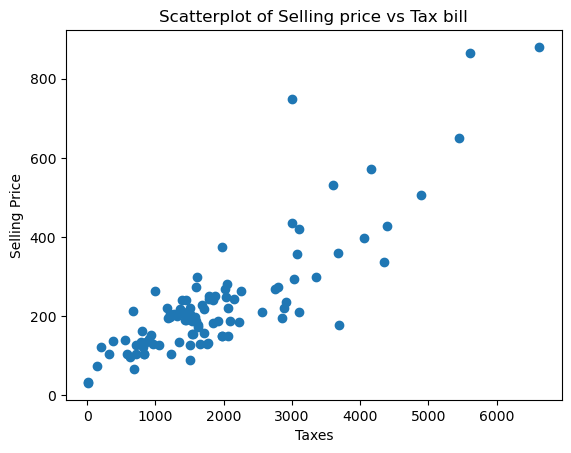

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          6124.8
Method:                          IRLS   Log-Likelihood:                -575.86
Date:                Sun, 15 Oct 2023   Deviance:                   5.8798e+05
Time:                        17:39:11   Pearson chi2:                 5.88e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9373
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.0393     15.291      3.207      0.0

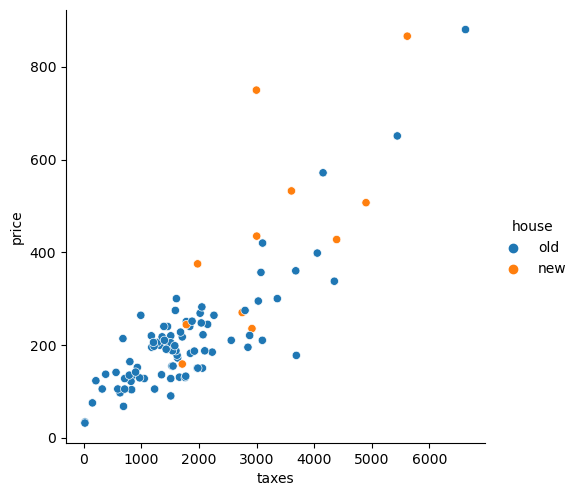

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

url_to_data = 'https://stat4ds.rwth-aachen.de/data/Houses.dat'
data = pd.read_csv(url_to_data, sep='\s+')

plt.scatter(data['taxes'], data['price'])
plt.xlabel('Taxes')
plt.ylabel('Selling Price')
plt.title('Scatterplot of Selling price vs Tax bill')
plt.show()

# part b
fit1, fit2 = glm(data)

# part c
estimated_variability(data)

# part d
aic(fit1, fit2)

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

`x2 is whether the house is new. For the Gamma model, we can see that after adjusting for taxes, the mean price for new homes is approximately 80.5 thousand dollars higher than for older homes, compared to the mean price for new homes is 86.2 for the normal model.`

In [40]:
def glm(df):
    df['house'] = df['new'].apply(lambda x: 'old' if x==0 else 'new')
    sns.pairplot(x_vars=['taxes'], y_vars=['price'], data=data, hue='house', height=5)

    fit1 = smf.glm(formula = 'price ~ taxes + new + taxes:new', data=data, family = sm.families.Gaussian()).fit()
    print(fit1.summary())
    
    print("")
    gamma_mod = smf.glm(formula = 'price ~ taxes + new + taxes:new', data=data, family = sm.families.Gamma(sm.families.links.Log()))
    fit2 = gamma_mod.fit()

    print(fit2.summary())
    
    return fit1, fit2

(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

`For the normal model, we can see the estimated variability is 78.8209 at each given value for the estimated mean. When using the gamma model, the estimated variability is 0.2955*mu_hat, which has variation between 29.55 and 147.75 thousand dollars for mu=100 and mu=500 respecitvely.`

In [ ]:
def estimated_variability(df):
    mean_selling_prices = np.arange(100000, 500001, 10000)
    # Initialize lists for normal and gamma std. errs
    std_errs_normal = []
    std_errs_gamma = []
    
    # Iterate through each different mean selling price
    for mean_price in mean_selling_prices:
        # Calculate the standard error for the normal GLM
        model_normal = sm.GLM(df['price'], sm.add_constant(df[['taxes', 'new']]), family=sm.families.Gaussian(link=sm.families.links.Log()))
        results_normal = model_normal.fit(cov_type='HC3')
        std_err_normal = np.sqrt(results_normal.scale)
        std_errs_normal.append(std_err_normal)

        # Calculate the standard error for the gamma GLM
        model_gamma = sm.GLM(df['price'], sm.add_constant(df[['taxes', 'new']]), family=sm.families.Gamma(link=sm.families.links.Log()))
        results_gamma = model_gamma.fit(cov_type='HC3')
        std_err_gamma = np.sqrt(results_gamma.scale)
        std_errs_gamma.append(std_err_gamma)

    print(f"Std error for normal GLM: {std_err_normal:.4f}")
    print(f"\n Std Errror for Gamma GLM: {std_err_gamma:.4f}")

(d) Which model is preferred according to AIC?

`The smaller the value for AIC, the better. When calculating the AIC for both the normal and gamma models, we get 1159.7154 and 1114.6479 respecively. We see that the AIC value for gamma model is smaller and therefore the preferred model.`

In [39]:
def aic(normal_model, gamma_model):
    normal_aic = normal_model.aic
    gamma_aic = gamma_model.aic
    print(f"\n normal_aic: {normal_aic:.4f}")
    print(f"\n gamma_aic: {gamma_aic:.4f}")
    

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

`We can use the coefficient to determine if weight statistically significantly impacts survival. After calculating the model, we can see the value for this is 0.1755 which is greater than 0 and would lead us to say the survival of sheep seems to depend on their weight.`

In [53]:
import pandas as pd
import statsmodels.api as sm

url_to_data = 'https://stat4ds.rwth-aachen.de/data/Sheep.dat'
data = pd.read_csv(url_to_data, sep='\s+')

weight = data['weight']
X = sm.add_constant(weight)
model = sm.GLM(data['survival'], X, family=sm.families.Binomial())

results = model.fit()

print(results.summary())

# part b
predicted_prob = results.predict(X)
values_above_50_percent = [weight[i] for i in range(len(weight)) if predicted_prob[i] > 0.50]
min_weight = min(values_above_50_percent)
print(f"Min weight for survival chance above 50%, {min_weight}")


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survival   No. Observations:                 1359
Model:                            GLM   Df Residuals:                     1357
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.22
Date:                Sun, 15 Oct 2023   Deviance:                       1290.4
Time:                        18:06:23   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1294
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0298      0.251     -8.103      0.0

(b)  For what weight values do the sheep have more than a 50% chance of survival?

`Determining the weight a sheep needs to have in order to have more than a 50% chance of survival is 11.6kg.`

## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

`Since there are two possible responses, yes or no, to having a sore throat on waking, we can use the Binomial distribution. The r-squared value of 0.3677 gives a measure for how well this chosen model fits the data, higher values are better, this is pretty centralized so we can assume it is a decent fit. The intercept (const coefficient) tells us when both D and T are zero, the baseline. We have a negative value which tells us it is less likely to have a sore throat if D and T are both zero. The Coefficient D, duration, is positive which tells us that the longer the duration of surgery, the more likely the patient is to have a sore throat when they wake up. The coefficient for T, type of device, is negatively correlated which suggests that patients that recieved T=1, trachial tube, are less likely to have a sore throat than those with a mask. Overall we can see some statistically significant correlations between the different coefficients.`

In [56]:
import pandas as pd

url_to_data = 'https://stat4ds.rwth-aachen.de/data/SoreThroat.dat'
data = pd.read_csv(url_to_data, sep='\s+')

X = data[['D', 'T']]
X = sm.add_constant(X)

Y = data['Y']

model = sm.GLM(Y, X, family=sm.families.Binomial())
results = model.fit()

print(results.summary())

# part b
glm_explanatory(data)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.069
Date:                Sun, 15 Oct 2023   Deviance:                       30.138
Time:                        18:19:22   Pearson chi2:                     37.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4173      1.095     -1.295      0.1

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

`The interaction between D and T can be represented with the coefficient value. This value is relatively small, 0.0746 and is positive which tells us that there is a correlation between D and T, and if the effect of D varies when T changes. When T is zero, we can interpret the coefficient of D which tells us the effect of duration when using a laryngeal mask airway. This is weakly, positivley correlated. Interpreting the different aspects of D is important because if it is statistically significant, then that suggests the effect D has on the probability of having a sore throat after surgery also depends on the type of device used, T. If it is not significant, then the effect of D is more consistent accross surgeries, regardless of device used. `

In [55]:
def glm_explanatory(df):
    df['D_T_interaction'] = df['D'] * df['T']
    constant = sm.add_constant(df[['D', 'T', 'D_T_interaction']])
    model = sm.GLM(df['Y'], constant, family=sm.families.Binomial())
    results = model.fit()
    print(results.summary())

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”